In [89]:
# Importar bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [90]:
df = pd.read_csv("data/01_raw/heart_statlog_cleveland_hungary_final.csv")
df

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]

# Exploratory Data Analysis

In [91]:
df.describe().T

count        mean         std   min    25%    50%  \
age                  1190.0   53.720168    9.358203  28.0   47.0   54.0   
sex                  1190.0    0.763866    0.424884   0.0    1.0    1.0   
chest pain type      1190.0    3.232773    0.935480   1.0    3.0    4.0   
resting bp s         1190.0  132.153782   18.368823   0.0  120.0  130.0   
cholesterol          1190.0  210.363866  101.420489   0.0  188.0  229.0   
fasting blood sugar  1190.0    0.213445    0.409912   0.0    0.0    0.0   
resting ecg          1190.0    0.698319    0.870359   0.0    0.0    0.0   
max heart rate       1190.0  139.732773   25.517636  60.0  121.0  140.5   
exercise angina      1190.0    0.387395    0.487360   0.0    0.0    0.0   
oldpeak              1190.0    0.922773    1.086337  -2.6    0.0    0.6   
ST slope             1190.0    1.624370    0.610459   0.0    1.0    2.0   
target               1190.0    0.528571    0.499393   0.0    0.0    1.0   

                        75%    max  
age                   60.00   77.0  
sex                    1.00    1.0  
chest pain type        4.00    4.0  
resting bp s         140.00  200.0  
cholesterol          269.75  603.0  
fasting blood sugar    0.00    1.0  
resting ecg            2.00    2.0  
max heart rate       160.00  202.0  
exercise angina        1.00    1.0  
oldpeak                1.60    6.2  
ST slope               2.00    3.0  
target                 1.00    1.0

In [92]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [93]:
#Checking unique values of all of the columns
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-----------------------------')

age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
-----------------------------
sex
[1 0]
-----------------------------
chest pain type
[2 3 4 1]
-----------------------------
resting bp s
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
-----------------------------
cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 22

In [94]:
# Existe um caso que os BPM é 0, o que não faz sentido, então temos que remover

In [95]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [96]:
#Checking if the data is balanced
df['target'].value_counts()
# The data is balanced

target
1    629
0    561
Name: count, dtype: int64

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


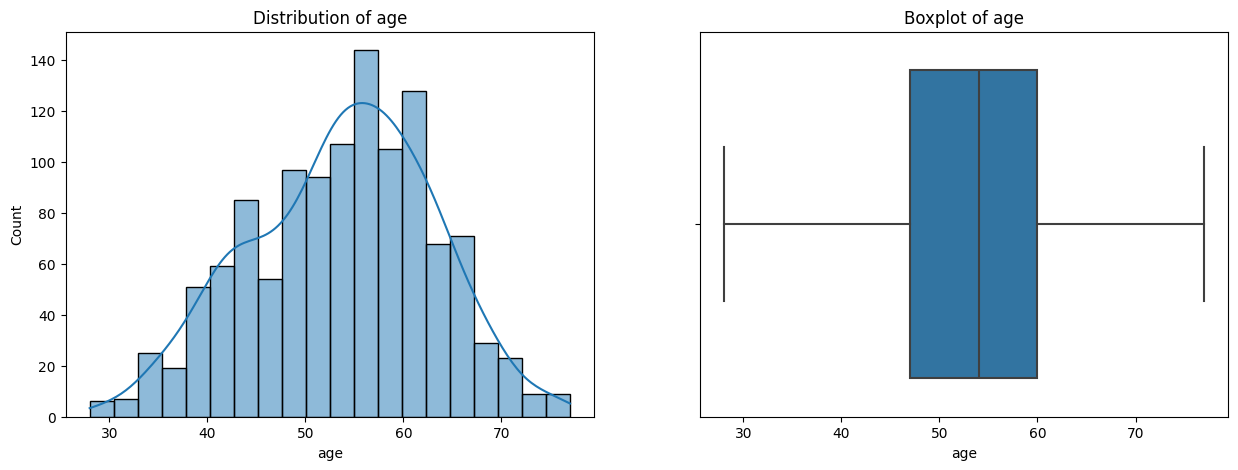

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


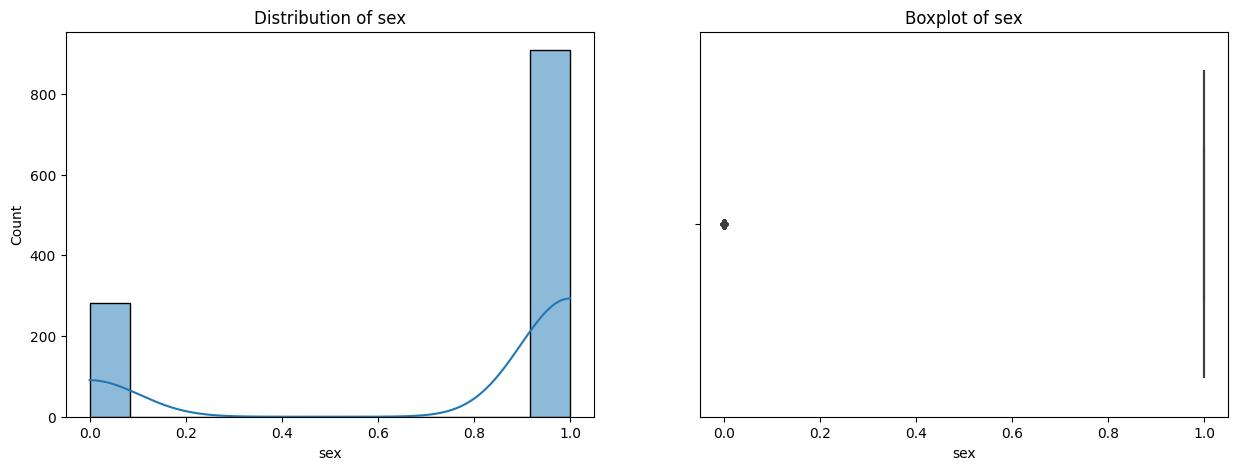

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


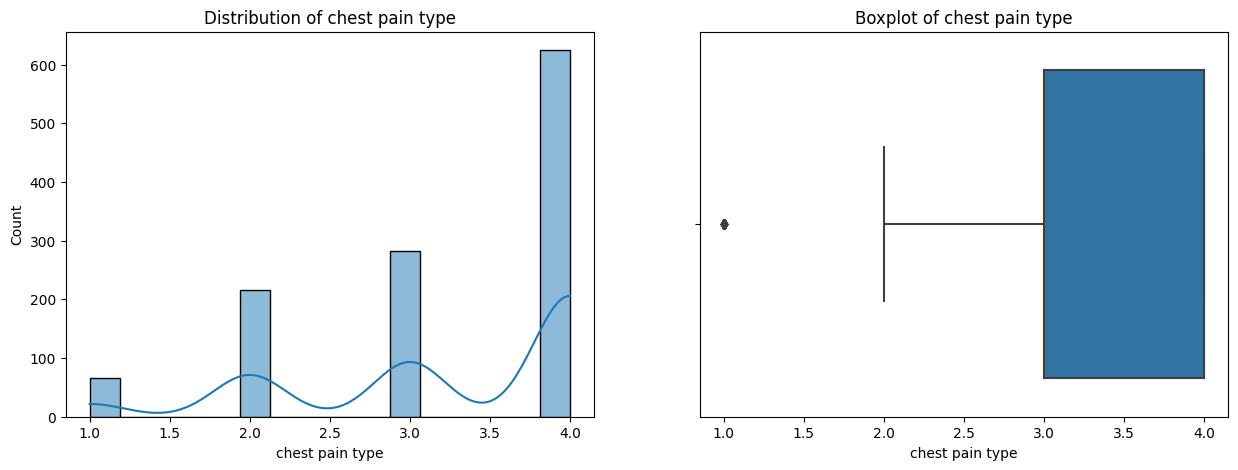

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


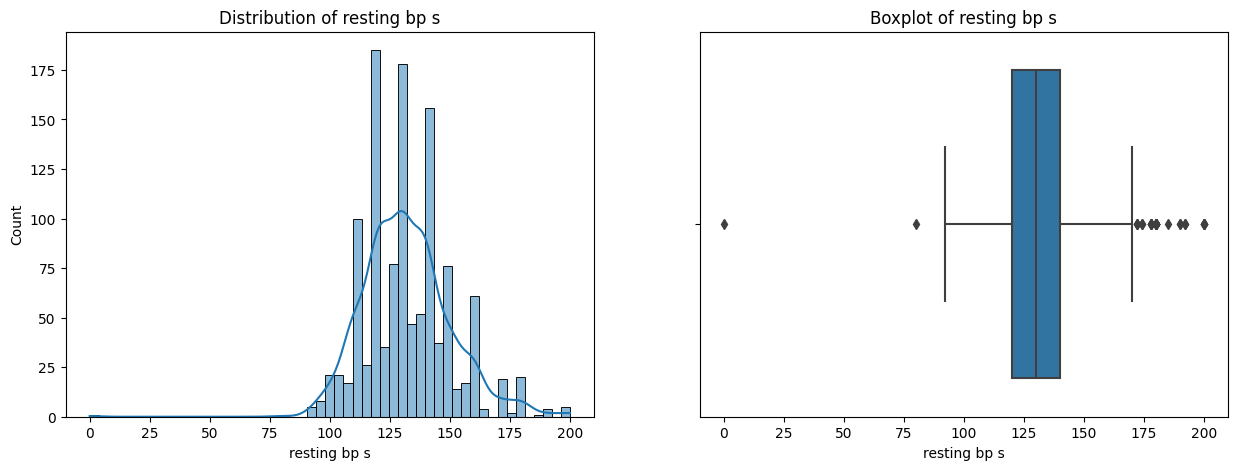

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


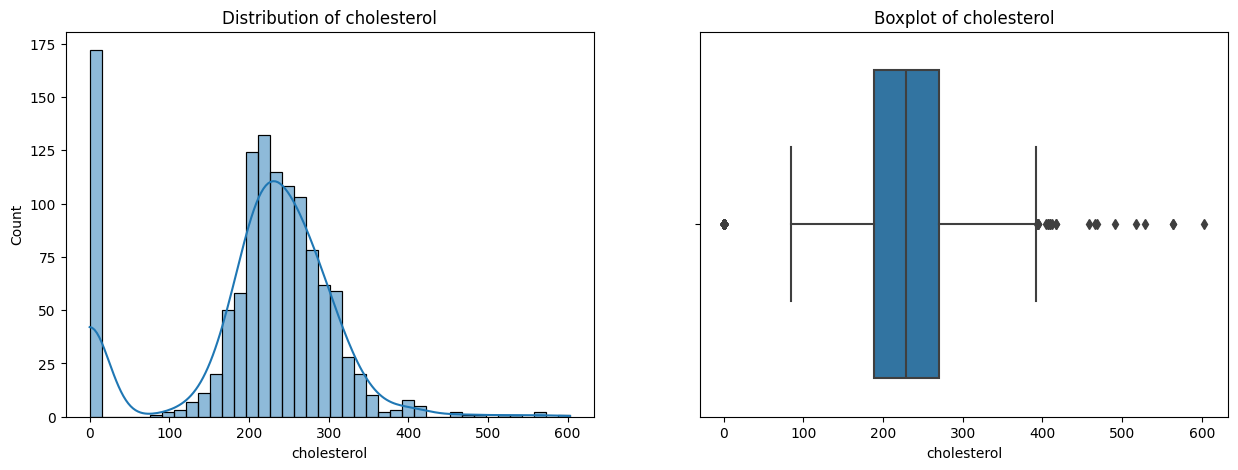

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


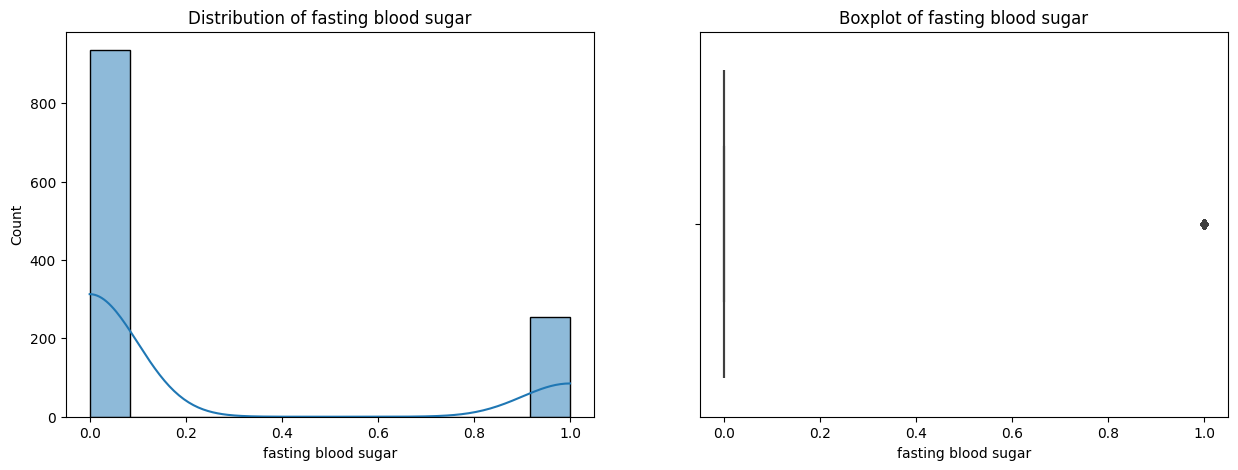

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


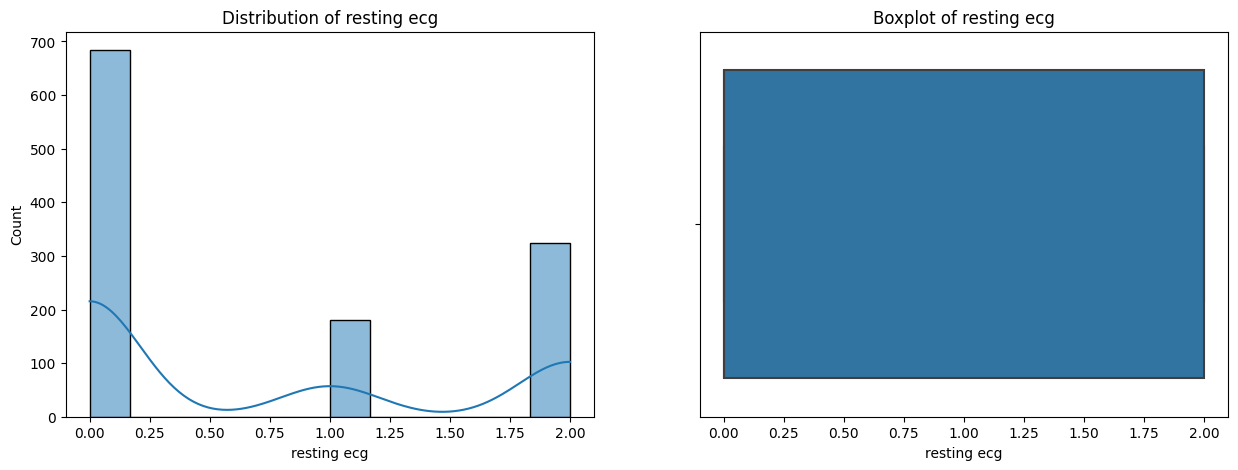

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


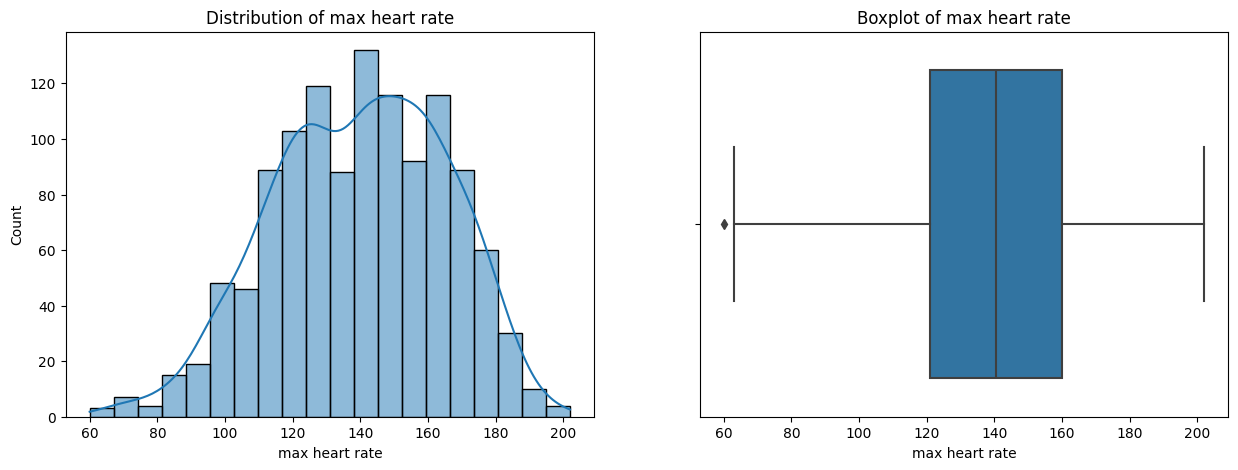

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


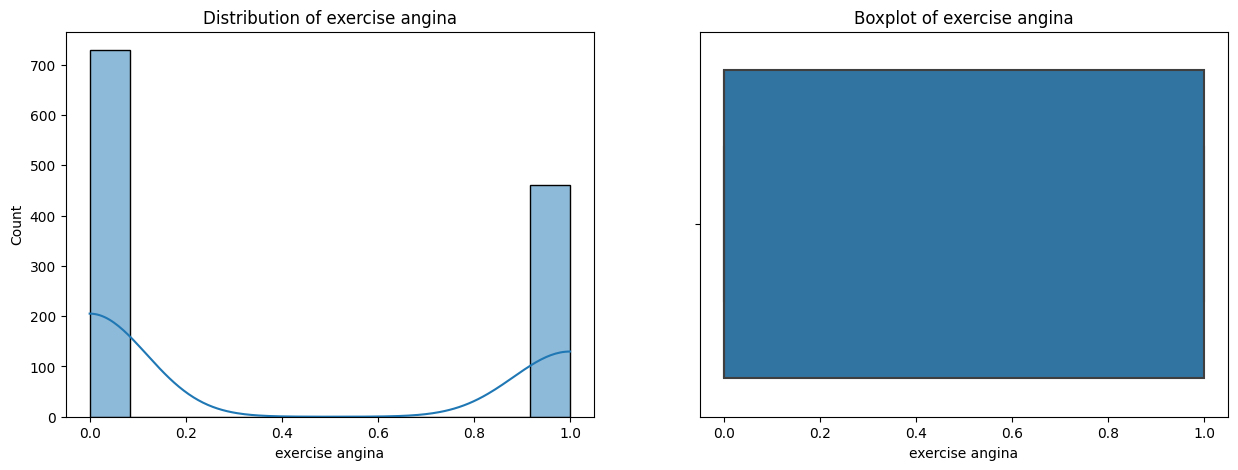

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


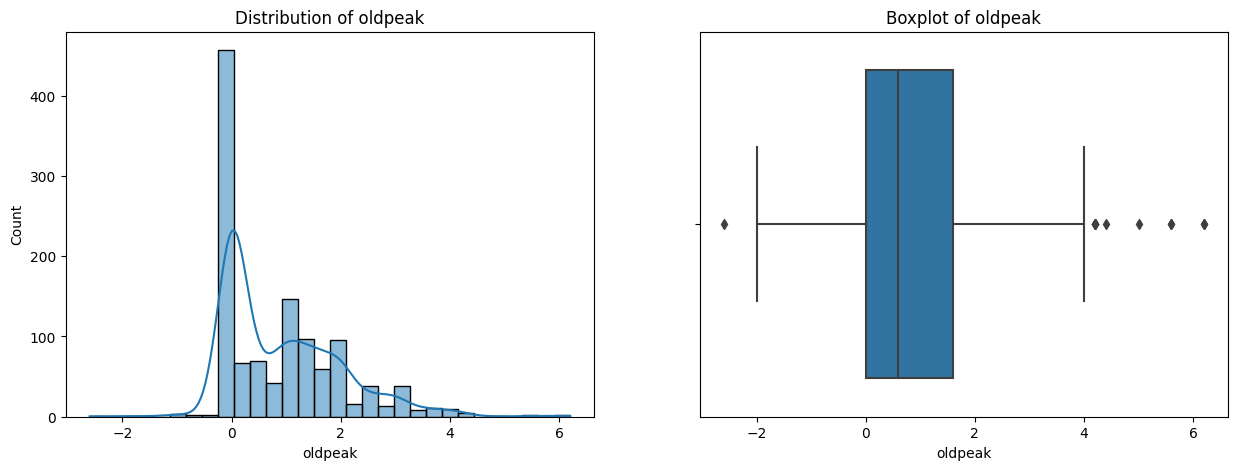

c:\Users\diogo\anaconda3\envs\test_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


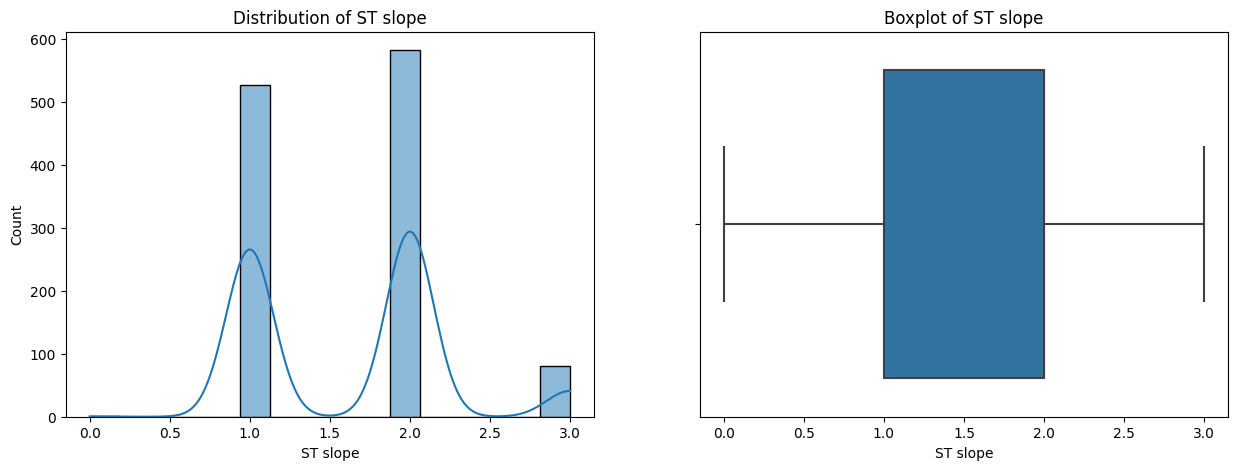

In [97]:
# code from https://www.kaggle.com/code/revypramana/heart-disease-xgboost-96-64
cols = ['age', 'sex', 'chest pain type', 'resting bp s',
    'cholesterol', 'fasting blood sugar', 'resting ecg', 
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

for i, column in enumerate(cols, 1):
    plt.figure(figsize=(15, 5))
    
    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    
    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.show()

# Checking for data quality and fixing issues

In [98]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
df.duplicated().sum()

272

In [100]:
# See the duplicated rows
X_train[X_train.duplicated()]

age  sex  chest pain type  resting bp s  cholesterol  \
1061   64    1                4           145          212   
996    39    1                4           118          219   
852    62    0                4           160          164   
679    44    1                3           120          226   
841    35    0                4           138          183   
...   ...  ...              ...           ...          ...   
871    59    1                3           150          212   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
860    62    0                4           140          268   
1126   42    1                2           120          295   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1061                    0            2             132                0   
996                     0            0             140                0   
852                     0            2             145                0   
679                     0            0             169                0   
841                     0            0             182                0   
...                   ...          ...             ...              ...   
871                     1            0             157                0   
1095                    0            0             155                0   
1130                    0            0             145                0   
860                     0            2             160                0   
1126                    0            0             162                0   

      oldpeak  ST slope  
1061      2.0         2  
996       1.2         2  
852       6.2         3  
679       0.0         1  
841       1.4         1  
...       ...       ...  
871       1.6         1  
1095      0.0         1  
1130      2.6         2  
860       3.6         3  
1126      0.0         1  

[176 rows x 11 columns]

In [101]:
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

In [105]:
# Remove the duplicated rows from the training set
X_train = remove_duplicates(X_train)
y_train = y_train[X_train.index]

0

In [106]:
# Ver missing values
X_train.isna().sum()
#não tem

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
dtype: int64

In [107]:
# Ver instancia em que o BPM é 0
X_train[X_train['resting bp s'] == 0]

age  sex  chest pain type  resting bp s  cholesterol  \
450   55    1                3             0            0   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
450                    0            0             155                0   

     oldpeak  ST slope  
450      1.5         2

In [ ]:
# Remove the row where the resting bp s is 0 in a function
def remove_zero_bp(df):
    df = df[df['resting bp s'] != 0]
    return df

# Remove the row where the resting bp s is 0
X_train = remove_zero_bp(X_train)
y_train = y_train[X_train.index]